# **Convolutional Neural Networks**

# Given

In [2]:
# loading the necessary libraries
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime, os

def plot_samples(x_train, y_train):
    ''' 
    This function takes a set of data samples and their labels as input and plots 10 samples for each class label.
    '''
    y_train = np.squeeze(y_train)
    fig, axes = plt.subplots(10, 11, frameon=False, figsize=(20, 16))  # Initializes the figure with 110 suplots
    fig.subplots_adjust(hspace = .05, wspace=.001)  # Adjusts the spacing between the plots
    classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']  # The names of the 10 classes
    for i in range(len(classes)):  # Loop over the number of classes
        axes[i,0].text(0,0.5,str(i)+' : '+classes[i], fontsize=15)  # Writes the class labels in the first column of subplots 
        axes[i,0].get_xaxis().set_visible(False)  # Removes the x-axis from the plot
        axes[i,0].get_yaxis().set_visible(False)  # Removes the y-axis from the plot
        axes[i,0].set_frame_on(False)  # Makes the Background of the plot transparent

        class_idxs = np.squeeze(np.where(y_train==i))  # Finds every index corresponding to the current class
        idxs = np.random.choice(class_idxs,10)  # Picks ten random indices to plot random class examples
        for j in range(10):  # Loop over the number of samples we want to plot
            axes[i,j+1].imshow(x_train[idxs[j]])  # Plots the sample Image in graysclae
            axes[i,j+1].get_xaxis().set_visible(False)  # Removes the x-axis from the plot
            axes[i,j+1].get_yaxis().set_visible(False)  # Removes the y-axis from the plot
    fig.savefig('training_examples.png', bbox_inches='tight')  # Saves the figure

def load_cifar10():
    '''
    Downloads the fashion mnist dataset and returns it.
    '''
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    return (x_train, y_train), (x_test, y_test)

# Exercise 1: Preparing the Data (1 Points)

Load the cifar10 dataset (you can use the provided function from the first code cell) and print the shape of the data and labels, both for training and test data.

In [3]:
(x_train, y_train), (x_test, y_test) = load_cifar10()
print(' shape of x_train: {}\n shape of y_train: {}\n shape of x_test: {}\n shape of y_test: {}'.format(np.shape(x_train), np.shape(y_train), np.shape(x_test), np.shape(y_test)))

170500096/170498071 [==============================] - 2s 0us/step
 shape of x_train: (50000, 32, 32, 3)
 shape of y_train: (50000, 1)
 shape of x_test: (10000, 32, 32, 3)
 shape of y_test: (10000, 1)


Normalize the data by scaling it to unit range.

Hint: The dataset contains 8bit PNG images

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

Take a look into the dataset by using the provided "plot_samples" function.

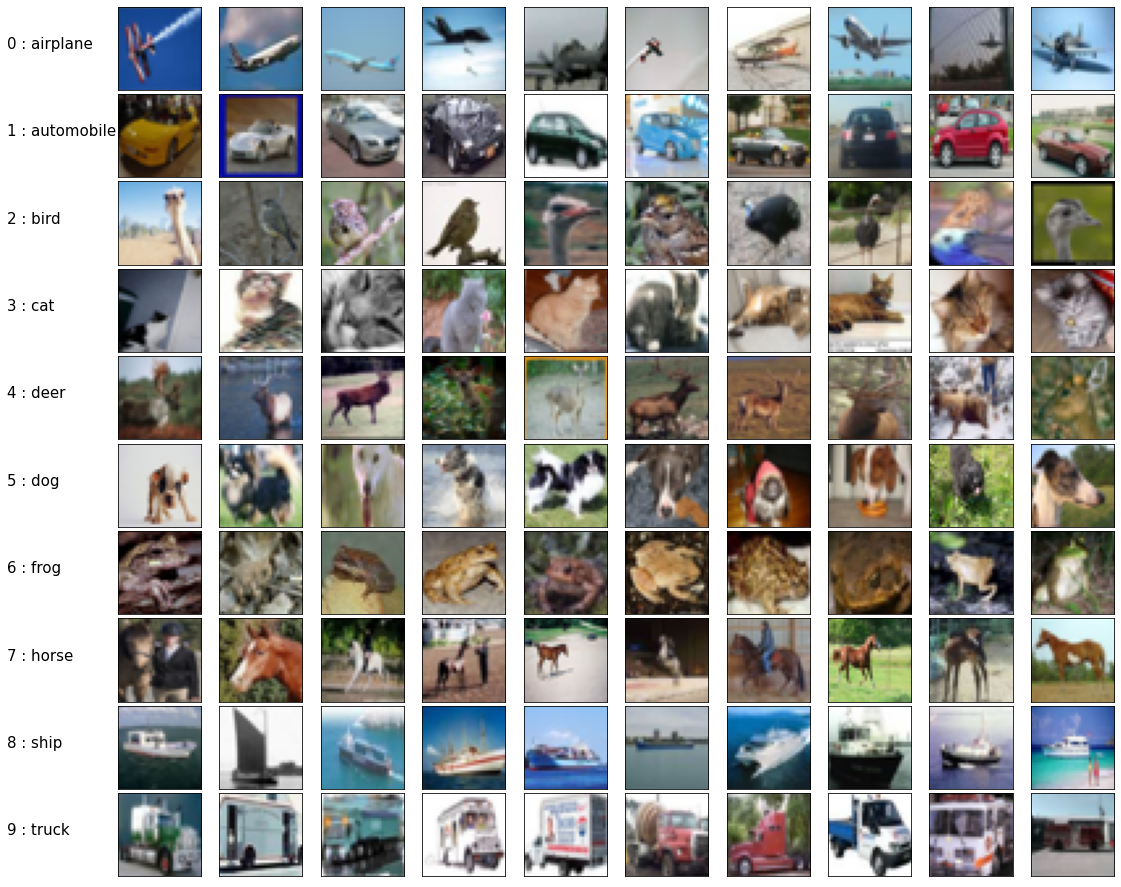

In [5]:
plot_samples(x_train, y_train)

# Exercise 2: Build a classical convolutional neural network (4 Points) 

Build the depicted convolutional neural network with the Sequential or Functional API.

![](https://drive.google.com/uc?export=view&id=1yiwNKyGX3tHPvIKpsadYcV-7y6mIj9gS)

Use the default values for the hyperparameters of the optimizer. Incorporate a validation dataset and include the accuracy as metric. Train the network for 100 epochs towards the sparse categorical crossentropy as loss function.

If you are uncertain about the syntax of the Keras layers, take a look at the respective documentation for [max pooling](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) and [convolutions](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D).

In [6]:
def initialize_model():
    return tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(16, 3, 1, padding='same', activation='relu', input_shape=(32, 32,3)),
            tf.keras.layers.MaxPool2D(2),
            tf.keras.layers.Conv2D(32, 3, 1, padding='same', activation='relu'),
            tf.keras.layers.MaxPool2D(2),
            tf.keras.layers.Conv2D(64, 3, 1, padding='same', activation='relu'),
            tf.keras.layers.MaxPool2D(2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(10, activation='softmax')
           ])

model = initialize_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=2000, epochs=100, validation_split=0.2)

model.evaluate(x_test, y_test)

Epoch 1/100
20/20 [==============================] - 35s 75ms/step - loss: 2.2196 - accuracy: 0.1793 - val_loss: 1.9212 - val_accuracy: 0.3178
Epoch 2/100
20/20 [==============================] - 1s 53ms/step - loss: 1.8618 - accuracy: 0.3379 - val_loss: 1.7289 - val_accuracy: 0.3840
Epoch 3/100
20/20 [==============================] - 1s 51ms/step - loss: 1.6738 - accuracy: 0.4002 - val_loss: 1.5975 - val_accuracy: 0.4228
Epoch 4/100
20/20 [==============================] - 1s 51ms/step - loss: 1.5544 - accuracy: 0.4386 - val_loss: 1.5150 - val_accuracy: 0.4670
Epoch 5/100
20/20 [==============================] - 1s 53ms/step - loss: 1.4777 - accuracy: 0.4696 - val_loss: 1.4499 - val_accuracy: 0.4841
Epoch 6/100
20/20 [==============================] - 1s 51ms/step - loss: 1.4238 - accuracy: 0.4842 - val_loss: 1.4080 - val_accuracy: 0.5001
Epoch 7/100
20/20 [==============================] - 1s 52ms/step - loss: 1.3789 - accuracy: 0.5062 - val_loss: 1.3583 - val_accuracy: 0.5186
Epoch

[1.116929531097412, 0.6902999877929688]

# Exercise 3: Analyze the Results (16 Points)

Now first visualize the training progress. **(1 Point)**

You can do this by saving the loss and metrics to a history object and plot them with matplotlib.

For questions on how to use matplotlib, refer to the example plotting functions in this or the previous exercise sheets, or see the [documentation](https://matplotlib.org/).

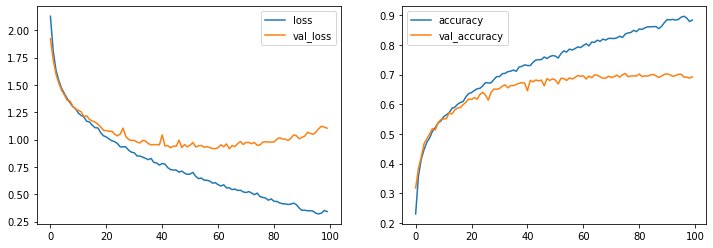

In [7]:
keys = [['loss', 'accuracy'], ['val_loss', 'val_accuracy']]
fig, axes = plt.subplots(1, 2, figsize=(12,4))
for i in range(2):
    axes[i].plot(range(len(history.history[keys[0][i]])), history.history[keys[0][i]], label=keys[0][i])
    axes[i].plot(range(len(history.history[keys[1][i]])), history.history[keys[1][i]], label=keys[1][i])
    axes[i].legend()

Explain what you see **(1 Point)**

While the trainig loss keeps decreasing, apart from a small spike after 80 epochs, the validation loss starts to increase after ~40 epochs. This indicates the onset of overfitting on the trainig data. This is also visible in the accurcy plots, as the accuracy on the training data seems to only slowly converge after 100 epochs to apove 90% accuracy, whereas the validation accurcy is converged after ~40 epochs to ~70%.

Next plot the Kernel weights for every Kernel of the first convolutional layer. **(4 Points)**

In order to plot the Kernels of the non overfitting model, you should insert the following callback in your training procedure. So reinitialize the model, compile it and re-train it with the callback for 100 epochs.  

The callback monitors the validation accuracy and saves the model weights for the state with best validation accuracy.

In [8]:
best_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath="best_weights.h5", 
                               monitor = 'val_accuracy',
                               verbose=1, 
                               save_best_only=True)

In [9]:
model = initialize_model()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=2000, epochs=100, validation_split=0.2, callbacks=[best_checkpoint])


Epoch 1/100
20/20 [==============================] - 2s 69ms/step - loss: 2.2174 - accuracy: 0.1728 - val_loss: 1.9705 - val_accuracy: 0.2853

Epoch 00001: val_accuracy improved from -inf to 0.28530, saving model to best_weights.h5
Epoch 2/100
20/20 [==============================] - 1s 55ms/step - loss: 1.9042 - accuracy: 0.3143 - val_loss: 1.7543 - val_accuracy: 0.3788

Epoch 00002: val_accuracy improved from 0.28530 to 0.37880, saving model to best_weights.h5
Epoch 3/100
20/20 [==============================] - 1s 53ms/step - loss: 1.7064 - accuracy: 0.3892 - val_loss: 1.6096 - val_accuracy: 0.4163

Epoch 00003: val_accuracy improved from 0.37880 to 0.41630, saving model to best_weights.h5
Epoch 4/100
20/20 [==============================] - 1s 52ms/step - loss: 1.5835 - accuracy: 0.4266 - val_loss: 1.5323 - val_accuracy: 0.4445

Epoch 00004: val_accuracy improved from 0.41630 to 0.44450, saving model to best_weights.h5
Epoch 5/100
20/20 [==============================] - 1s 53ms/st

Now reload the saved weights of the 'best' model state into your model and get an array of the weights of the first convolution layer. **(2 Points)**

Hint: The returned object of the method call 'get_weights' on a single layer is a list [w, b] containing the weights and biases of that layer. You only need the former. The weight array itself has dimensions (Kernel_Width, Kernel_Height, Input_Channels, Output_Channels), i.e. in our case (3, 3, 3, 16) for the first layer.

In [10]:
model.load_weights('best_weights.h5')
my_weights = model.layers[0].get_weights()[0]
print(np.shape(my_weights))

(3, 3, 3, 16)


Now use the weights you got and plot all kernels of the first layer in one figure. **(4 Points)**

For this you have to normalize the weight values to the range [0, 1] 

Hint: if you want to plot an RGB image with matplotlibs 'imshow' method, you have to pass a 3 dimensional array with shape (height, width, 3). To get that shape out of 3 2D numpy arrays a,b and c you can use: np.stack((a,b,c), axis=-1)

It is also possible to specify the colormap (cmap) of the imshow method, e.g. 'Greys', 'Reds', 'Greens' or 'Blues'






or alternatively:


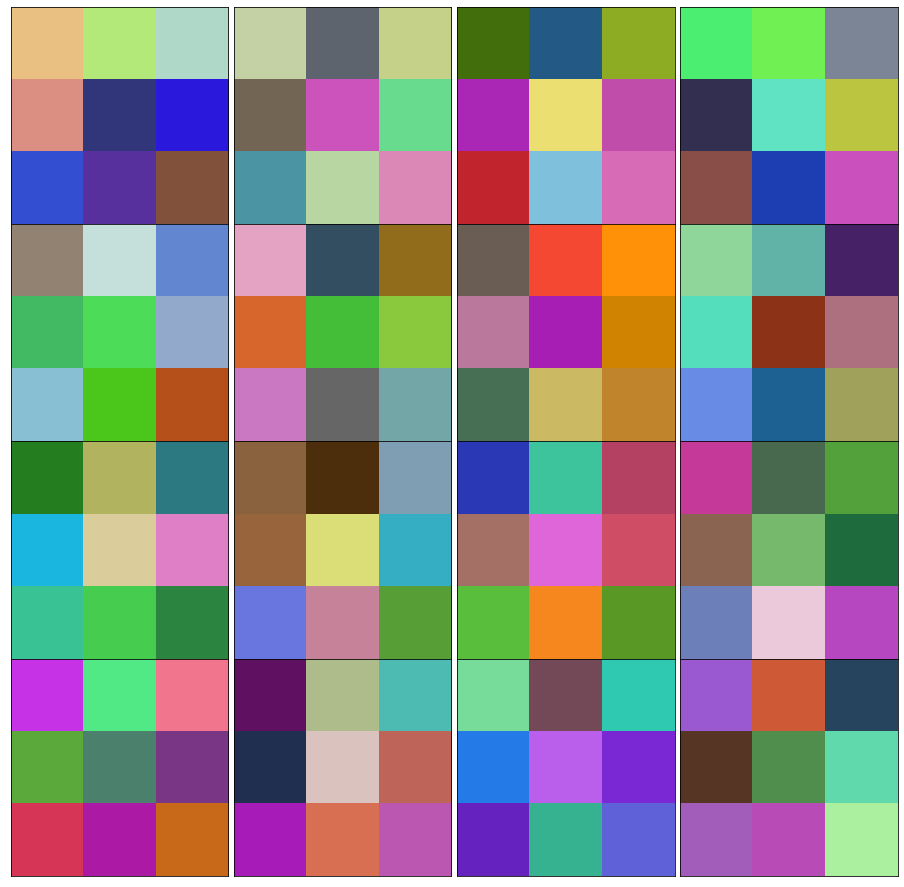

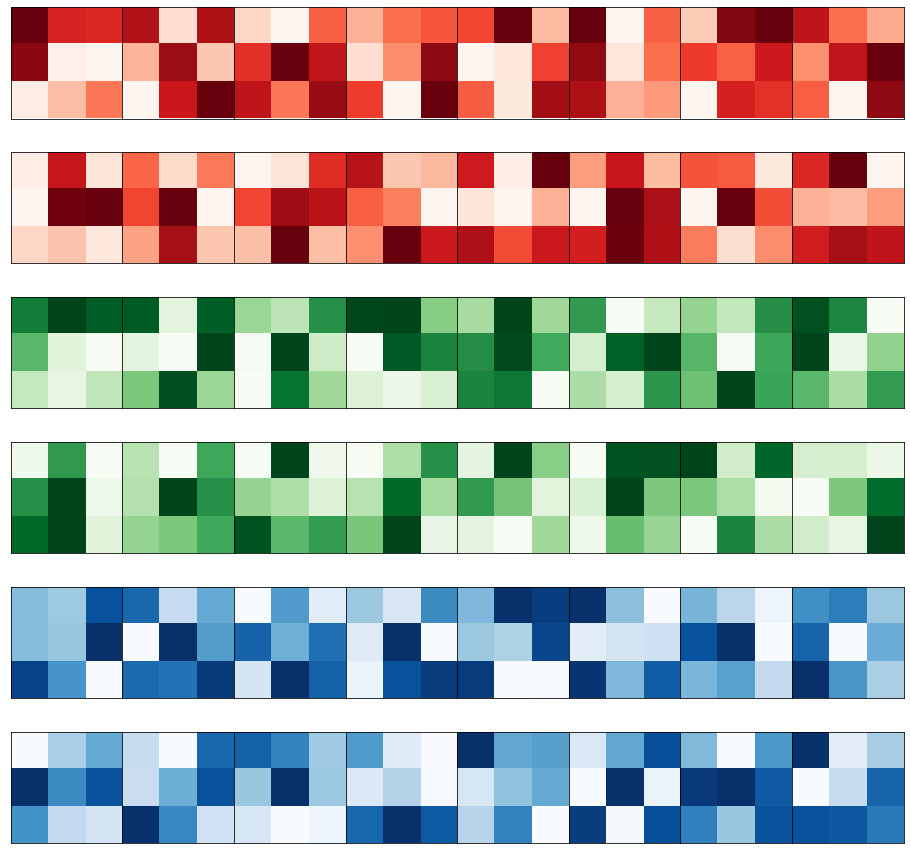

In [11]:
def normalize(x):
    #return scale(x)
    return (x - np.min(x))/(np.max(x) - np.min(x))

my_weights = normalize(my_weights)

fig, axes = plt.subplots(4, 4, figsize=(16,16), gridspec_kw={'hspace':0.0, 'wspace':0.0})
for i in range(16):
    j = i // 4
    k = i % 4
    axes[j, k].imshow(my_weights[:,:,:,i])
    axes[j, k].get_xaxis().set_visible(False)  # Removes the x-axis from the plot
    axes[j, k].get_yaxis().set_visible(False)  # Removes the y-axis from the plot
    fig.savefig('rgb_kernel_weights.png', bbox_inches='tight')  # Saves the figure

print('or alternatively:')
cmaps = ['Reds', 'Greens', 'Blues']
fig, axes = plt.subplots(6, 8, figsize=(16,16), gridspec_kw={'hspace':0.0, 'wspace':0.0})
for i in range(48):
    j = i // 8
    k = i % 8
    m = i % 16
    n = i // 16
    axes[j, k].imshow(my_weights[:,:,n,m], cmap=cmaps[n])
    axes[j, k].get_xaxis().set_visible(False)  # Removes the x-axis from the plot
    axes[j, k].get_yaxis().set_visible(False)  # Removes the y-axis from the plot
    fig.savefig('sep_kernel_weights.png', bbox_inches='tight')  # Saves the figure



Explain what you can deduce from these plots in 1-3 lines. **(1 Point)**

Due to the small size of the Kernels there is not much structural Information visible. As well there is no structural difference between the different color channels (uniform distribution over all input channels). However the set of Kernels predictint a given output channel do sometimes favour certain colors, e.g. green is underrepresented in the second plot in the first line. 

Now plot the activations after the first and the last convolution layer **(2 Points)**

For this you can use the code written below.

In [12]:
layer_outputs = [layer.output for layer in model.layers] # you may need to change model to the name of your model

activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs) # you may need to change model to the name of your model

Use the activation_model to predict the outputs for one image of the test dataset and plot the activations of the first and the last convolution in one figure each.

For a meaningful evaluation you should also plot the original image.

Hint: Even for only one image the input to the model must be 4 dimensional (Batchsize = 1). So you will need to expand the coresponding dimension.

(32, 32, 16)
(8, 8, 64)


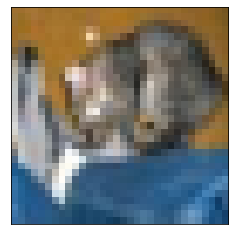

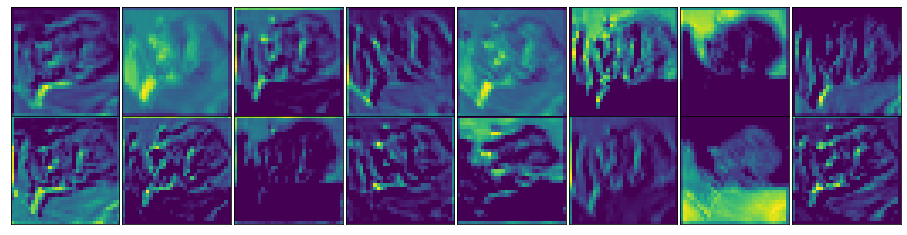

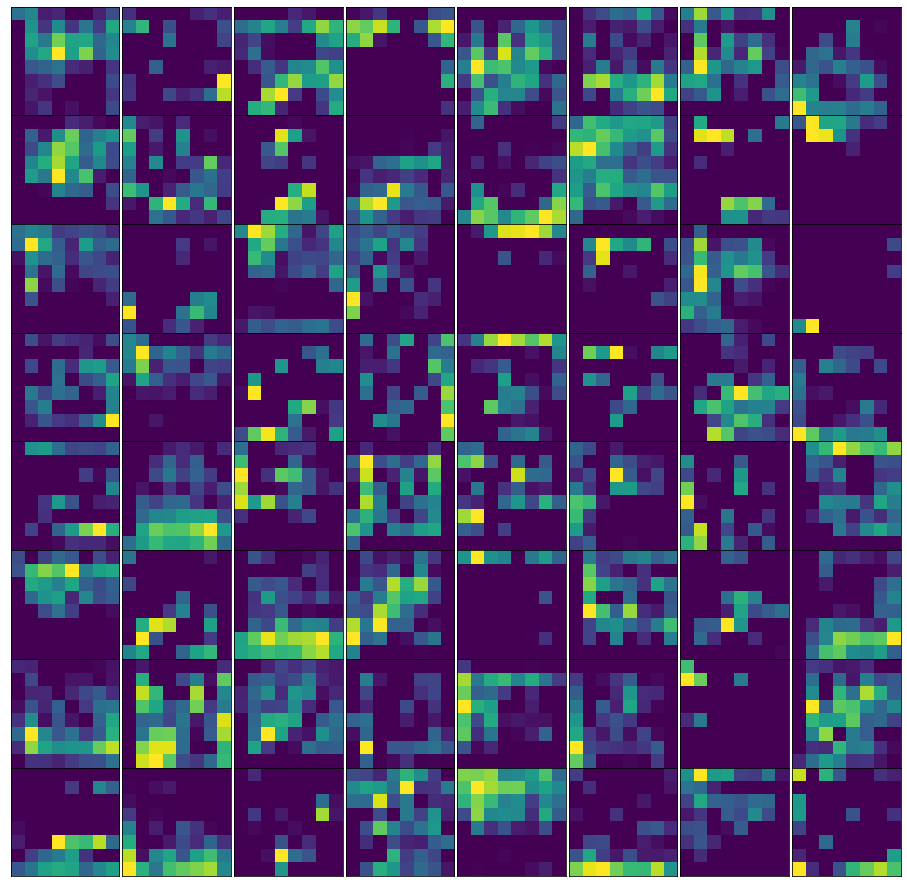

In [13]:
activations = activation_model.predict(np.expand_dims(x_test[0], 0))

first_activations = np.squeeze(activations[0])
last_activations = np.squeeze(activations[4])

print(np.shape(first_activations))
print(np.shape(last_activations))

fig, ax = plt.subplots()
ax.imshow(x_test[0])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

fig, axes = plt.subplots(2, 8, figsize=(16,4), gridspec_kw={'hspace':0.0, 'wspace':0.0})
for i in range(16):
    j = i // 8
    k = i % 8
    axes[j, k].imshow(first_activations[:,:,i])
    axes[j, k].get_xaxis().set_visible(False)  # Removes the x-axis from the plot
    axes[j, k].get_yaxis().set_visible(False)  # Removes the y-axis from the plot
    fig.savefig('first_conv_activation.png', bbox_inches='tight')  # Saves the figure

fig, axes = plt.subplots(8, 8, figsize=(16,16), gridspec_kw={'hspace':0.0, 'wspace':0.0})
for i in range(64):
    j = i // 8
    k = i % 8
    axes[j, k].imshow(last_activations[:,:,i])
    axes[j, k].get_xaxis().set_visible(False)  # Removes the x-axis from the plot
    axes[j, k].get_yaxis().set_visible(False)  # Removes the y-axis from the plot
    fig.savefig('last_conv_activation.png', bbox_inches='tight')  # Saves the figure

Explain what you can deduce from the visualization of the activations. **(1 Point)**

After the first layer we can see that the model concentrates in the different channels on different aspects of the data, like outlinings of equallly coloured objects, stripes or shadings. After the last convolution we can no longer see such meaningfull information, but certain shapes in some of the activations.

# Exercise 4: Advancing the network (8 Points)

Explain qualitatively what is different if you change the pooling layers to convolutions with a Kernelsize of 3 and a stride of 2 or 3, and what effect this might have on the model accuracy. **(2 Points)**

This also works as a downsampling on the layer output. However it adds additional calculations and especially not only the data of one channel is downsampled, but of every channel into one output channel, determined by the respective number of output channels of the layer. Additionally with a stride of 2 the 'downsampling window is overlapping, different to the pooling practice. However even if that standing alone is hardly understandable as a good way to downsample the data (given you are used to pooling), we can view this as a combination of one 'classical' convolution layer and a pooling layer, as the computations done in this new convolutional layer is by no means less meaningfull than the classical ones. 

Viewing it like this, it should enhance the models accuracy, as there are no longer any information bearing values tossed away. But as this also results in a higher complexity of the data for the parameterized downsampling layer ('unimportant' values were previously thrown away), this will probably also enhance the training time and effect the convergence of the model for given optimizer settings.

Now change the convolutional network to incorporate a strided convolution instead of each pooling layer, keeping the shape of the outputs the same and plot the evolution of the loss and accuracy again. **(2 Points)**

In [14]:
def initialize_model():
    return tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(16, 3, 1, padding='same', activation='relu', input_shape=(32, 32,3)),
            tf.keras.layers.Conv2D(16, 3, 2, padding='same', activation='relu'),
            tf.keras.layers.Conv2D(32, 3, 1, padding='same', activation='relu'),
            tf.keras.layers.Conv2D(32, 3, 2, padding='same', activation='relu'),
            tf.keras.layers.Conv2D(64, 3, 1, padding='same', activation='relu'),
            tf.keras.layers.Conv2D(64, 3, 2, padding='same', activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(10, activation='softmax')
           ])

model = initialize_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(x_train, y_train, batch_size=2000, epochs=100, validation_split=0.2)

model.evaluate(x_test, y_test)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 16)        2320      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)             

[4.953331470489502, 0.6075999736785889]

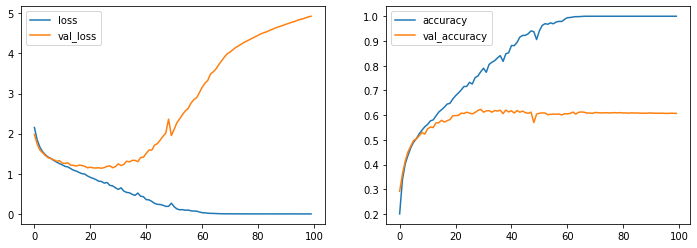

In [15]:
keys = [['loss', 'accuracy'], ['val_loss', 'val_accuracy']]
fig, axes = plt.subplots(1, 2, figsize=(12,4))
for i in range(2):
    axes[i].plot(range(len(history.history[keys[0][i]])), history.history[keys[0][i]], label=keys[0][i])
    axes[i].plot(range(len(history.history[keys[1][i]])), history.history[keys[1][i]], label=keys[1][i])
    axes[i].legend()

Compare the best achieved accuracy on the validation set to the one achieved before as well the the respectie evolution of the losses and the accuracies. Explain what happened. **(1 Point)** 

The model started to overfit already after ~20 epochs. At least partially for this reason, the best achieved accuracy is lower.

Now also incorporate Dropout in the model. You should decide for yourself at which places to put the Dropout layers and justify your decisions. **(3 Points)**

In [16]:
def initialize_model():
    return tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(16, 3, 1, padding='same', activation='relu', input_shape=(32, 32,3)),
            tf.keras.layers.Conv2D(16, 3, 2, padding='same', activation='relu'),
            tf.keras.layers.Conv2D(32, 3, 1, padding='same', activation='relu'),
            tf.keras.layers.Conv2D(32, 3, 2, padding='same', activation='relu'),
            tf.keras.layers.Conv2D(64, 3, 1, padding='same', activation='relu'),
            tf.keras.layers.Conv2D(64, 3, 2, padding='same', activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(10, activation='softmax')
           ])

model = initialize_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(x_train, y_train, batch_size=2000, epochs=100, validation_split=0.2)

model.evaluate(x_test, y_test)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 16)        2320      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 32)          9248      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)             

[1.4195266962051392, 0.6757000088691711]

For these rather small models and short training times the Dropout should only be incorporated in the fully connected layers.
In general it would also make sense to incorporate Dropout after Convolutional layers or even drop complete layers or blocks of layers. But in this framework the Dropout after the small Convolutions can produce worse results for short training times, as only a few weights remain at each iteration which can find difficulties in representing the features of the data. If the training time and accordingly the decay of the learning rate is chosen correctly, this problem can be lifted.